In [1]:
from kinetic_measure import *
import plot_property_map as ppm
import pynbody
import numpy as np
import scipy.optimize as so
import scipy.stats as ss
import os
from matplotlib.patches import Ellipse


In [2]:
import kinetic_measure as km
import imp
imp.reload(km)

<module 'kinetic_measure' from '/home/seoyoung/scripts/kinetic_measure.py'>

In [3]:
savedir = '/home/seoyoung/analysis/figure/'

simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/'
param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.param'

filelist = os.listdir(simdir)

In [4]:
result = [i[-6:] for i in filelist if i.startswith('h1.cosmo50') and len(i)==35]
result.sort()

In [5]:
filt_size = 35
n_dir = 10
nbins = 15
width = 11 #kpc/h unit
snap = result[-14]
#snap = result[-27] #redshift 0.4


data_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.'+snap
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()
s.properties['z']

0.1642476073853092

In [6]:

print("get halos")
h = s.halos()
h0 = h[0]
pynbody.analysis.halo.center(h0,mode='hyb')



get halos


/home/seoyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


Text(15,23,'$\\epsilon$ = nan')

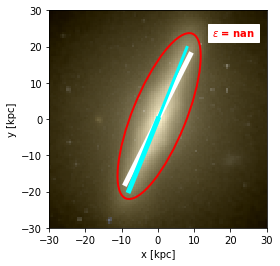

In [23]:
s.rotate_y(-90)

imp.reload(km)


spin_axis = get_spin_axis(s.star[s.star['r']<15])

s_filt = s[pynbody.filt.Sphere('35 kpc h^-1')]

a,b,phi, center, ellip = km.isophote_fit(s_filt.star)
rgb = pynbody.plot.stars.render(s_filt, width = '60 kpc', resolution = 100, dynamic_range = 4,plot = True,ret_im = True)



ell = Ellipse(center, 2 * a, 2 * b,  phi * 180 / np.pi + 90 , facecolor = 'none',edgecolor = 'r', linewidth = 2) 

plt.gca().add_artist(ell)

#plt.plot([0,spin_axis[0]*10],[0,spin_axis[1]*10],linewidth = 5, color = 'w')
#plt.plot([-spin_axis[0]*10,0],[-spin_axis[1]*10,0],linewidth = 5, color = 'w')


plt.plot([0,-spin_axis[1]*20],[0,spin_axis[0]*20],linewidth = 5, color = 'w')
plt.plot([spin_axis[1]*20,0],[-spin_axis[0]*20,0],linewidth = 5, color = 'w')

plt.plot([0,8],[0,np.tan(phi)*8],linewidth = 3, color = 'cyan')
plt.plot([-8,0],[-np.tan(phi)*8,0],linewidth = 5, color = 'cyan')


#plt.text(-13,-12,"$\mu_{r}$ = 21 [arcsec$^{-2}$]", color = 'b', backgroundcolor = 'white', fontweight = 'semibold')
plt.text(15,23,"$\epsilon$ = "+str(round(np.sqrt(1-(b/a)**2),2)), color = 'r', backgroundcolor = 'white', fontweight = 'semibold')

In [24]:
print(a,b)

7.402826852193349 24.51987477614895


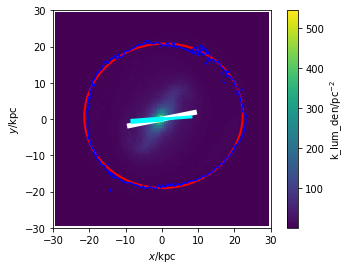

In [20]:
image = pynbody.plot.sph.image(s_filt.star, qty='k_lum_den', units = 'pc^-2', width='40 kpc h^-1', log=False, clear=False, noplot=False, resolution = 100)

cs = plt.contour(pynbody.plot.stars.convert_to_mag_arcsec2(image), levels = [20], extent = [-30,30,-30,30], colors = 'b')

ell = Ellipse(center, 2 * a, 2 * b,  phi * 180 / np.pi , facecolor = 'none',edgecolor = 'r', linewidth = 2) 

plt.gca().add_artist(ell)


plt.plot([0,-spin_axis[1]*20],[0,spin_axis[0]*20],linewidth = 5, color = 'w')
plt.plot([spin_axis[1]*20,0],[-spin_axis[0]*20,0],linewidth = 5, color = 'w')

plt.plot([0,8],[0,np.tan(phi)*8],linewidth = 3, color = 'cyan')
plt.plot([-8,0],[-np.tan(phi)*8,0],linewidth = 5, color = 'cyan')

In [22]:
print(a,b)

21.87328296833928 19.913884737559624


In [21]:
phi*180/np.pi

4.254008484750611

a>b


/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
/home/seoyoung/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futu

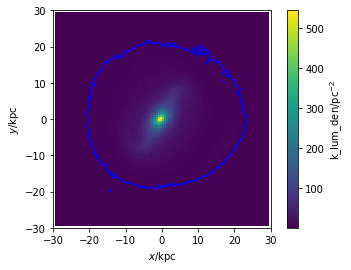

In [11]:
imp.reload(km)
s_filt = s[pynbody.filt.Sphere('40 kpc h^-1')] # avoid interlopers
#s_filt.rotate_x(90)
v_slit, sig_slit, r_slit, sig_0, ellip,dtheta = km.get_slit(s_filt,15,15, align = 'phot')  
#s_filt.rotate_x(-90)



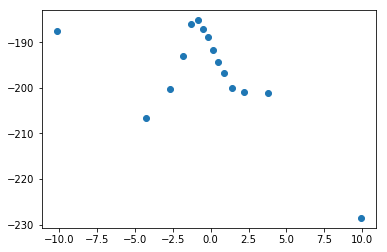

In [12]:
plt.scatter(r_slit,v_slit)

In [44]:
    del globals()['s']
    del globals()['h']
    del globals()['h0']